In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Conv2D ,MaxPooling2D
from tensorflow.keras.models import Sequential

In [4]:
!cp 'drive/MyDrive/pneumonia (1)/rsna-pneumonia-detection-challenge.zip' 'rsna-pneumonia-detection-challenge.zip'

In [5]:
ls

drive/  rsna-pneumonia-detection-challenge.zip  sample_data/


In [6]:
!unzip 'rsna-pneumonia-detection-challenge.zip'

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

In [7]:

ls

drive/                                  stage_2_sample_submission.csv
rsna-pneumonia-detection-challenge.zip  stage_2_test_images/
sample_data/                            stage_2_train_images/
stage_2_detailed_class_info.csv         stage_2_train_labels.csv


In [8]:
data=pd.read_csv("stage_2_train_labels.csv")

In [9]:

data.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [10]:
data["Target"].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [11]:
data.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

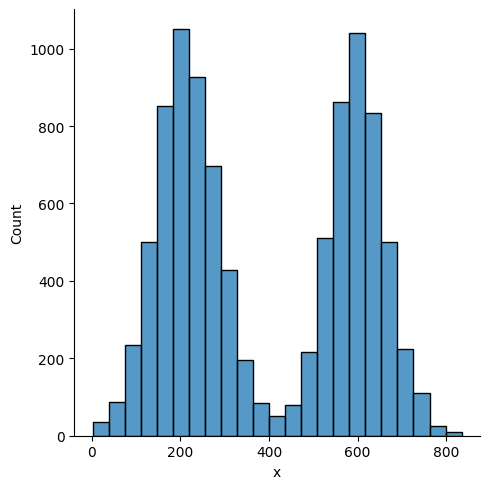

In [12]:
sns.displot(data["x"])

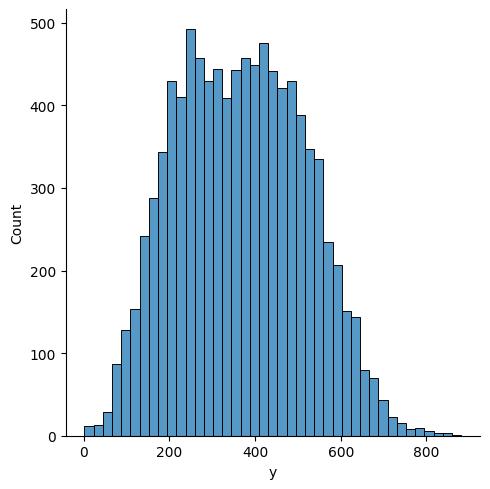

In [13]:
sns.displot(data["y"])

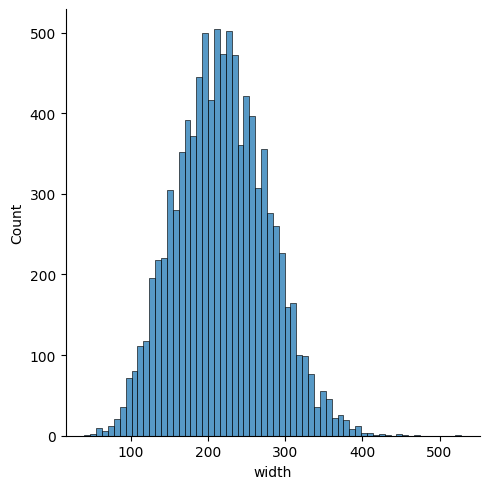

In [14]:
sns.displot(data["width"])

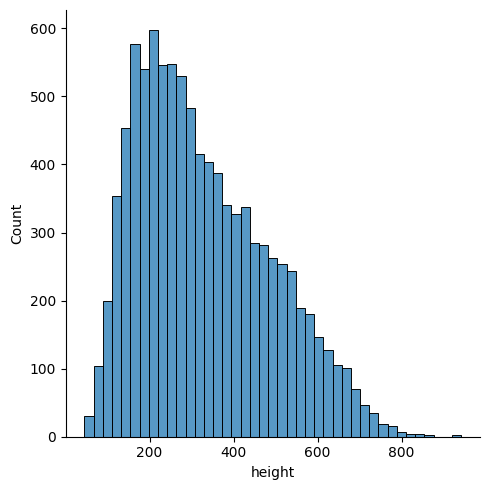

In [15]:
sns.displot(data["height"])

In [16]:
data["x"]=data["x"].fillna(0.0)
data["y"]=data["y"].fillna(0.0)
data["width"]=data["width"].fillna(0.0)
data["height"]=data["height"].fillna(0.0)

In [17]:

data.isna().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

In [18]:
class_info =pd.read_csv("stage_2_detailed_class_info.csv")

In [19]:
class_info.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [20]:
class_info["class"].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [21]:
class_info.isna().sum()

patientId    0
class        0
dtype: int64

In [22]:
df = pd.concat([data,class_info["class"]],axis=1,sort=False)

In [23]:
df.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [24]:
df.duplicated().sum()

0

In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          30227 non-null  float64
 2   y          30227 non-null  float64
 3   width      30227 non-null  float64
 4   height     30227 non-null  float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


<Axes: ylabel='class'>

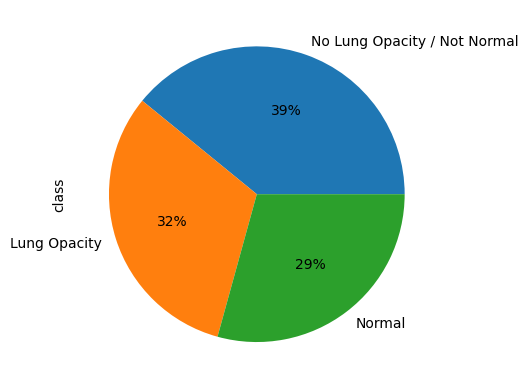

In [26]:
df["class"].value_counts().plot(kind='pie',autopct='%1.0f%%', subplots=False)

In [27]:
df.corr()

x         y     width    height    Target
x       1.000000  0.762055  0.795007  0.735061  0.846951
y       0.762055  1.000000  0.811707  0.634177  0.897660
width   0.795007  0.811707  1.000000  0.915537  0.950152
height  0.735061  0.634177  0.915537  1.000000  0.865294
Target  0.846951  0.897660  0.950152  0.865294  1.000000

In [28]:

pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.6 MB/s eta 0:00:00


In [29]:
import pydicom
patientId = data['patientId'][0]
dcm_file = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [30]:

dicom_df=df
dicom_df.shape

(30227, 7)

In [31]:
from tqdm import tqdm
def process_dicom_data(data_df):
    for n, pid in tqdm(enumerate(data_df['patientId'].unique())):        
        dcm_file = '/content/stage_2_train_images/%s.dcm' % pid
        dcm_data = pydicom.read_file(dcm_file)        
        idx = (data_df['patientId']==dcm_data.PatientID)
        data_df.loc[idx,'Modality'] = dcm_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = dcm_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
    return data_df        

In [32]:
dicom_df = process_dicom_data(dicom_df)


26684it [02:09, 205.50it/s]


In [33]:
dicom_df = dicom_df.astype({"PatientAge": int})
dicom_df.fillna(0.0, inplace=True)
dicom_df.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class Modality  PatientAge PatientSex  \
0  No Lung Opacity / Not Normal       CR          51          F   
1  No Lung Opacity / Not Normal       CR          48          F   
2  No Lung Opacity / Not Normal       CR          19          M   
3                        Normal       CR          28          M   
4                  Lung Opacity       CR          32          F   

  BodyPartExamined ViewPosition  
0            CHEST           PA  
1            CHEST           PA  
2            CHEST           AP  
3            CHEST           PA  
4            CHEST           AP

In [34]:
dicom_df.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class', 'Modality',
       'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition'],
      dtype='object')

In [35]:
dicom_df = dicom_df.drop('Target', axis=1)

In [36]:
dicom_df['PatientSex'].astype('category')
dicom_df['ViewPosition'].astype('category')
dicom_df['PatientSex'] = np.where(dicom_df["PatientSex"].str.contains("M"), 1, 0)
dicom_df['ViewPosition'] = np.where(dicom_df["ViewPosition"].str.contains("AP"), 1, 0)

In [37]:
dicom_df.head()

patientId      x      y  width  height  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    0.0    0.0    0.0     0.0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    0.0    0.0    0.0     0.0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    0.0    0.0    0.0     0.0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    0.0    0.0    0.0     0.0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   

                          class Modality  PatientAge  PatientSex  \
0  No Lung Opacity / Not Normal       CR          51           0   
1  No Lung Opacity / Not Normal       CR          48           0   
2  No Lung Opacity / Not Normal       CR          19           1   
3                        Normal       CR          28           1   
4                  Lung Opacity       CR          32           0   

  BodyPartExamined  ViewPosition  
0            CHEST             0  
1            CHEST             0  
2            CHEST             1  
3            CHEST             0  
4            CHEST             1

In [38]:
dicom_df["Modality"].value_counts()

CR    30227
Name: Modality, dtype: int64

In [39]:
dicom_df.corr()

x         y     width    height  PatientAge  PatientSex  \
x             1.000000  0.762055  0.795007  0.735061   -0.053137    0.009206   
y             0.762055  1.000000  0.811707  0.634177   -0.024397    0.028091   
width         0.795007  0.811707  1.000000  0.915537   -0.049035    0.037665   
height        0.735061  0.634177  0.915537  1.000000   -0.050976    0.029863   
PatientAge   -0.053137 -0.024397 -0.049035 -0.050976    1.000000   -0.009842   
PatientSex    0.009206  0.028091  0.037665  0.029863   -0.009842    1.000000   
ViewPosition  0.361044  0.353190  0.411144  0.423878   -0.060333    0.016904   

              ViewPosition  
x                 0.361044  
y                 0.353190  
width             0.411144  
height            0.423878  
PatientAge       -0.060333  
PatientSex        0.016904  
ViewPosition      1.000000

In [40]:
def show_dicom_image(data_df):
        img_data = list(data_df.T.to_dict().values())
        f, ax = plt.subplots(2,2, figsize=(16,18))
        for i,data_row in enumerate(img_data):
            pid = data_row['patientId']
            dcm_file = '/content/stage_2_train_images/%s.dcm' % pid
            dcm_data = pydicom.read_file(dcm_file)                    
            ax[i//2, i%2].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
            ax[i//2, i%2].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))

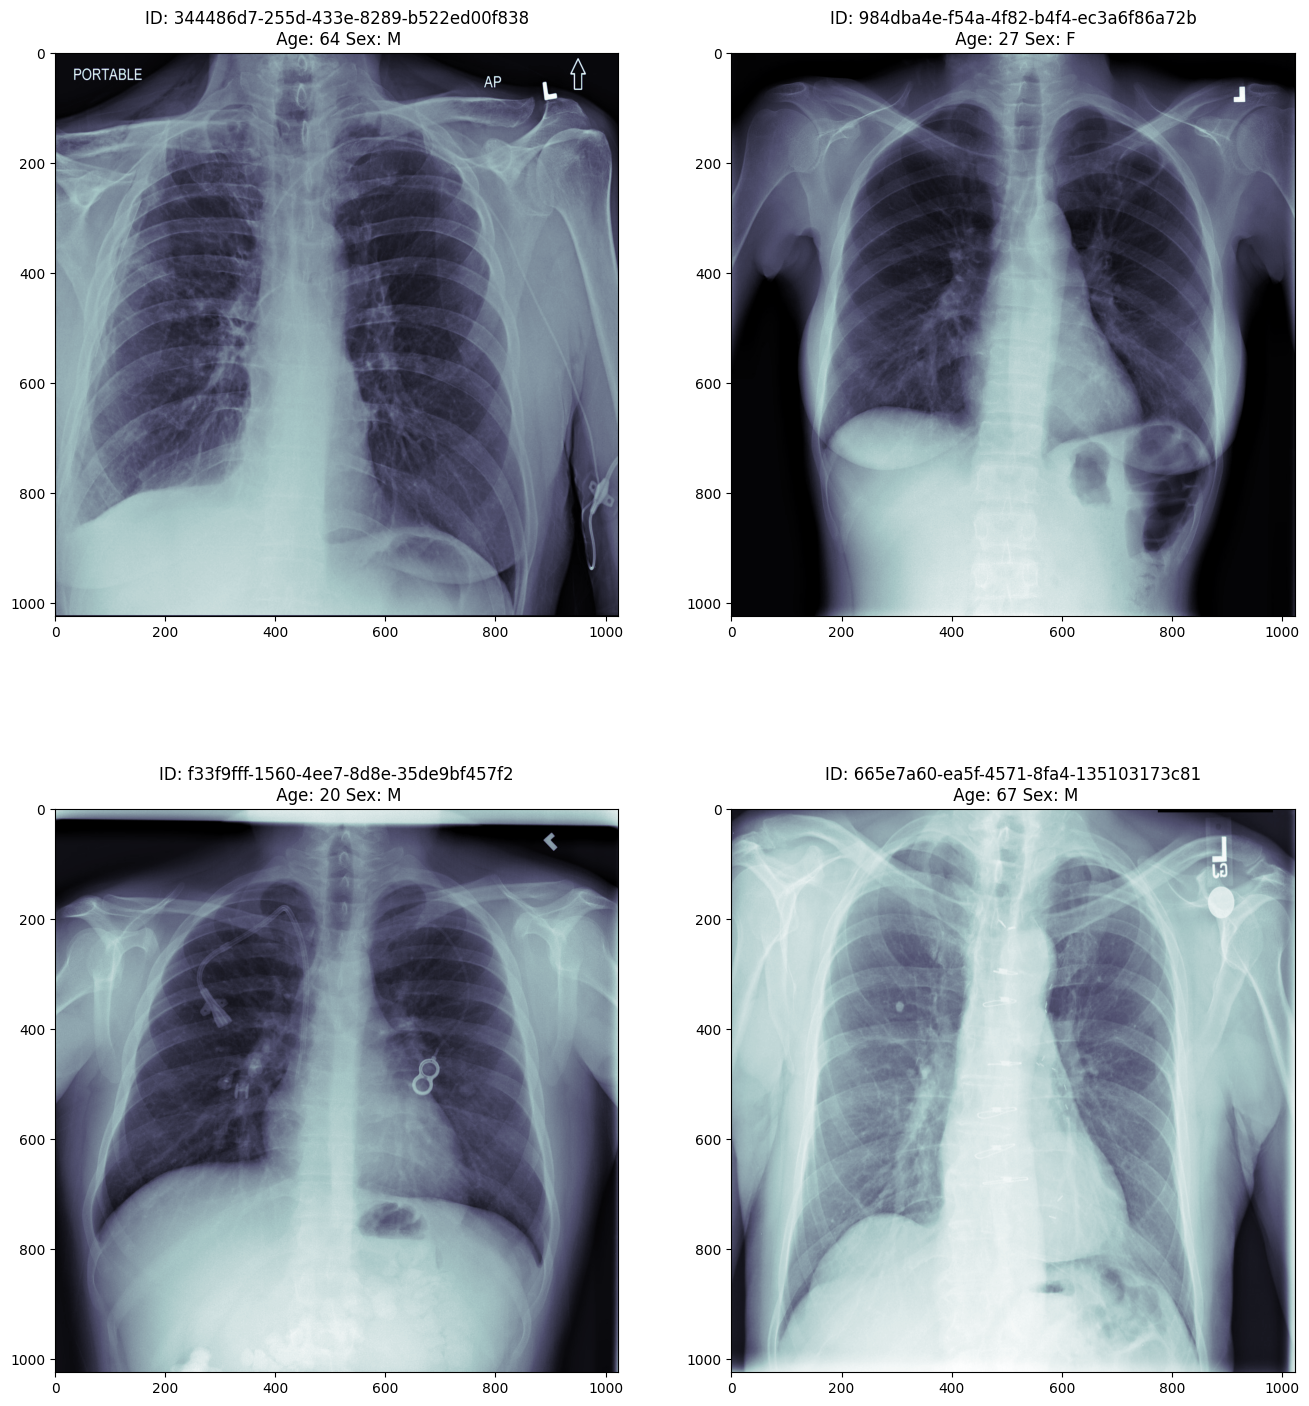

In [41]:
show_dicom_image(df[df['Target']==0].sample(n=4))

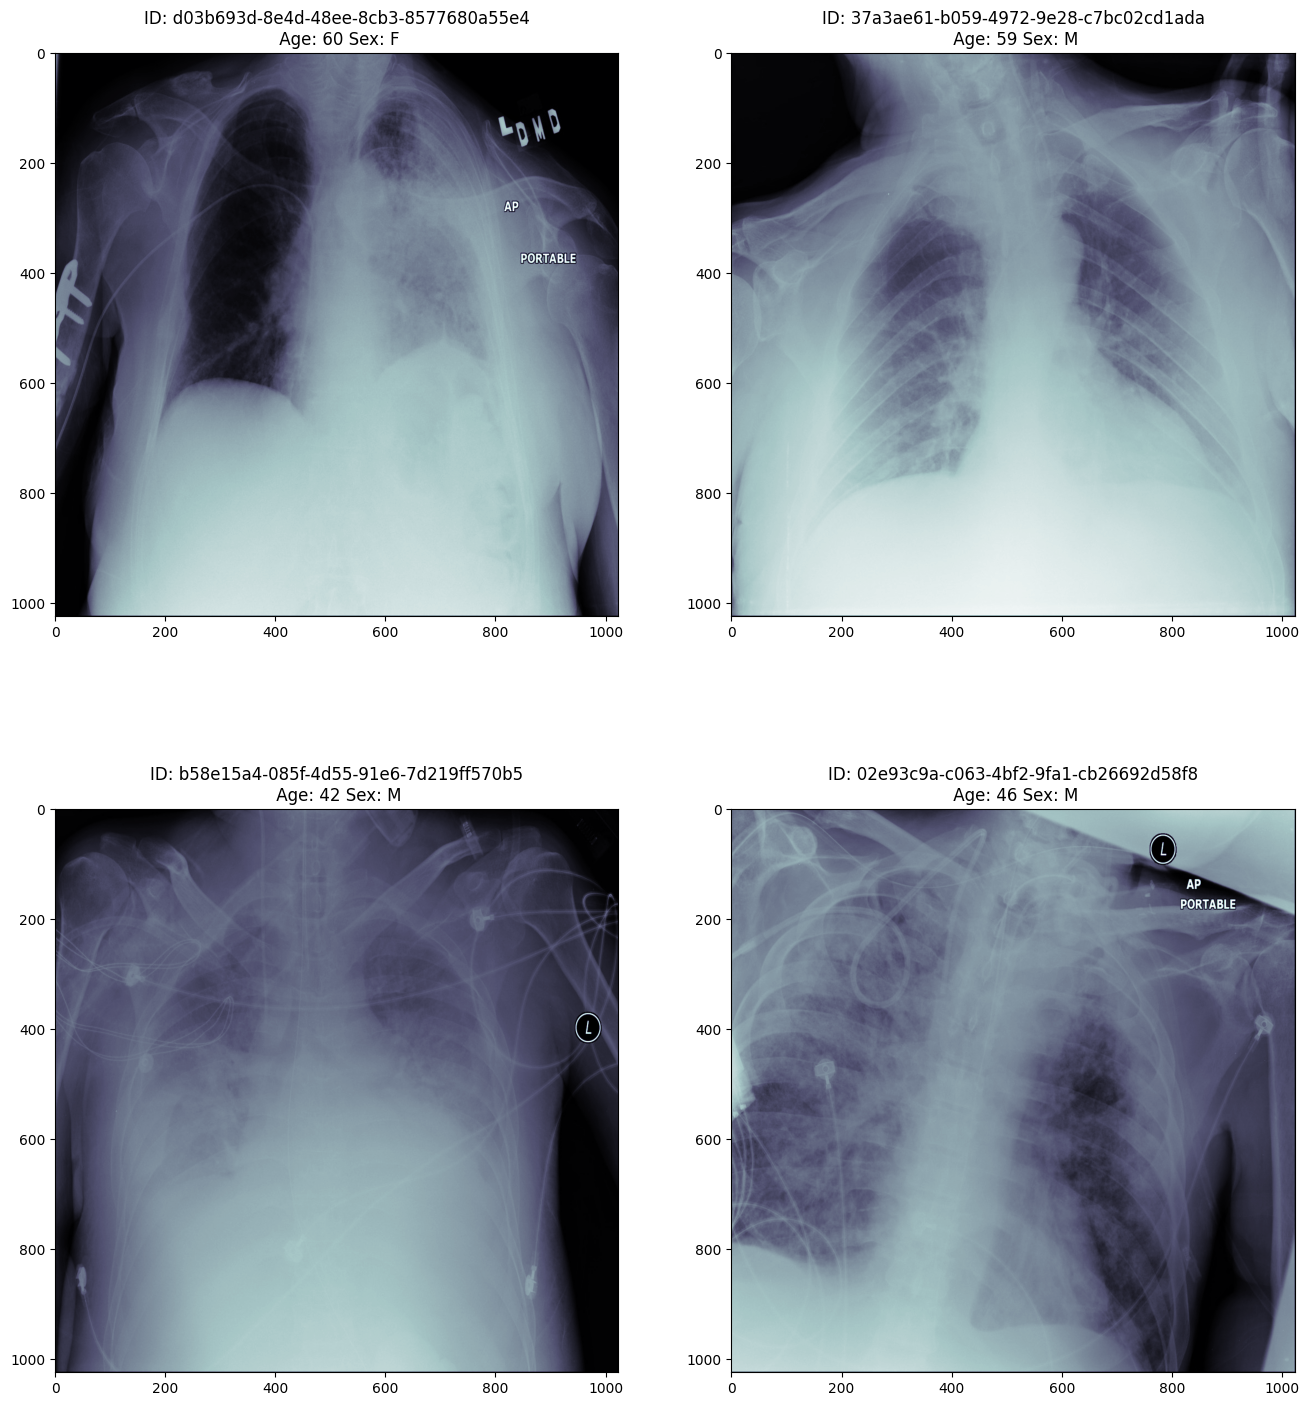

In [42]:
show_dicom_image(df[df['Target']==1].sample(n=4))

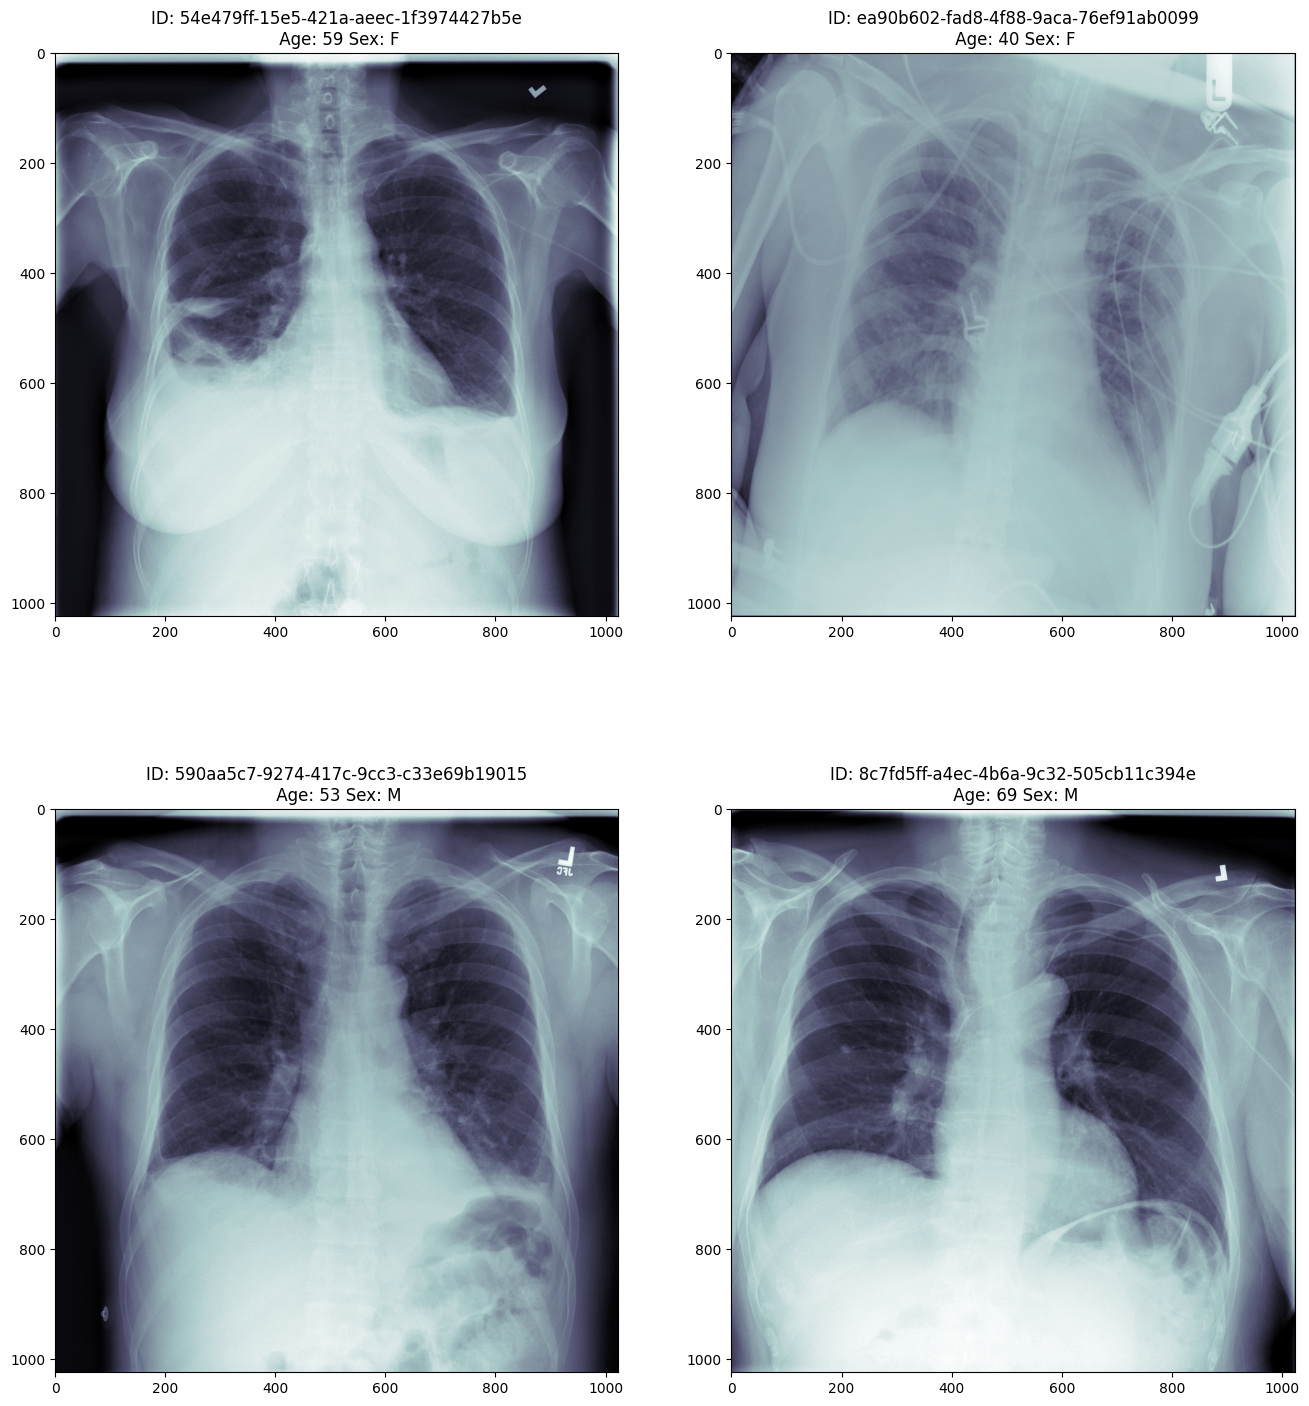

In [43]:
show_dicom_image(df[ (df['Target']==0) & (df['class']=='No Lung Opacity / Not Normal')].sample(n=4))

In [44]:
from matplotlib.patches import Rectangle
import gc
import glob
import cv2
import warnings
warnings.simplefilter(action = 'ignore')
import csv
import random
import numpy as np
import pandas as pd
from tensorflow import keras
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches

In [45]:
def show_dicome_with_boundingbox(data_df):
    img_data = list(data_df.T.to_dict().values())
    f, ax = plt.subplots(2,2, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        pid = data_row['patientId']
        dcm_file = '/content/stage_2_train_images/%s.dcm' % pid
        dcm_data = pydicom.read_file(dcm_file)                    
        ax[i//2, i%2].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
        ax[i//2, i%2].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))
        rows = data_df[data_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())        
        for j, row in enumerate(box_data):            
            x,y,width,height = row['x'], row['y'],row['width'],row['height']
            rectangle = Rectangle(xy=(x,y),width=width, height=height, color="red",alpha = 0.1)
            ax[i//2, i%2].add_patch(rectangle)    

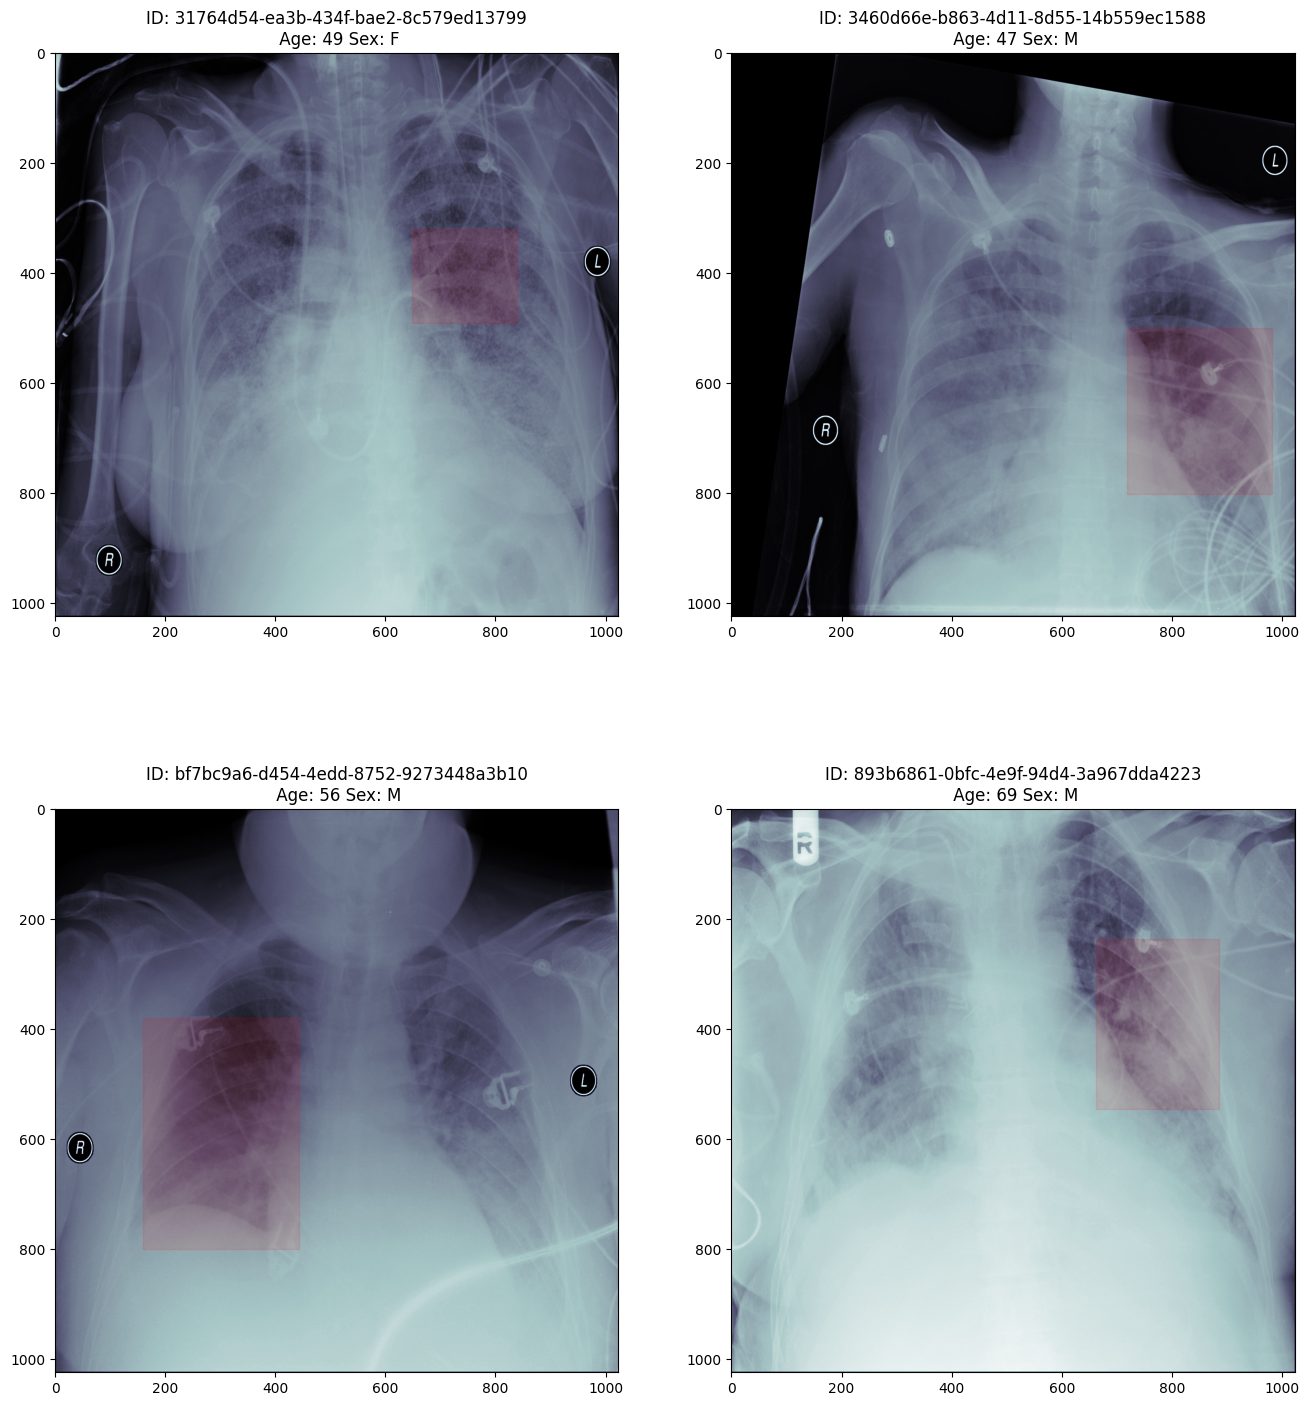

In [46]:
show_dicome_with_boundingbox(df[df['Target']==1].sample(n=4))

In [47]:
pneumonia_locations = {}
# load table
with open(os.path.join('stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [48]:
# load and shuffle filenames
folder = 'stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000


In [49]:
class generator(keras.utils.Sequence):    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [50]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
   
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [51]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [52]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = 'stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [53]:
EPOCHS=5
MULTI_PROCESSING = True 

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)

Epoch 1/5
145/145 [==============================] - 2690s 18s/step - loss: 0.5046 - accuracy: 0.9506 - mean_iou: 0.6429 - val_loss: 0.4501 - val_accuracy: 0.9646 - val_mean_iou: 0.7028 - lr: 1.0000e-04
Epoch 2/5
145/145 [==============================] - 2605s 18s/step - loss: 0.4378 - accuracy: 0.9675 - mean_iou: 0.7200 - val_loss: 0.4317 - val_accuracy: 0.9699 - val_mean_iou: 0.7379 - lr: 7.5000e-05
Epoch 3/5
145/145 [==============================] - 2586s 18s/step - loss: 0.4186 - accuracy: 0.9699 - mean_iou: 0.7356 - val_loss: 0.4253 - val_accuracy: 0.9685 - val_mean_iou: 0.7248 - lr: 2.5000e-05
Epoch 4/5
145/145 [==============================] - 2562s 17s/step - loss: 0.4070 - accuracy: 0.9716 - mean_iou: 0.7389 - val_loss: 0.4250 - val_accuracy: 0.9699 - val_mean_iou: 0.7309 - lr: 0.0000e+00
Epoch 5/5
145/145 [==============================] - 2596s 18s/step - loss: 0.4102 - accuracy: 0.9712 - mean_iou: 0.7443 - val_loss: 0.4245 - val_accuracy: 0.9682 - val_mean_iou: 0.7294 - 

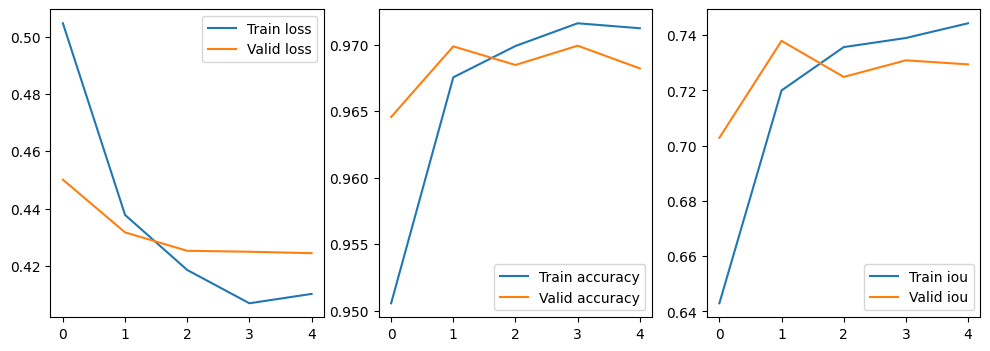

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

4/4 [==============================] - 1s 23ms/step


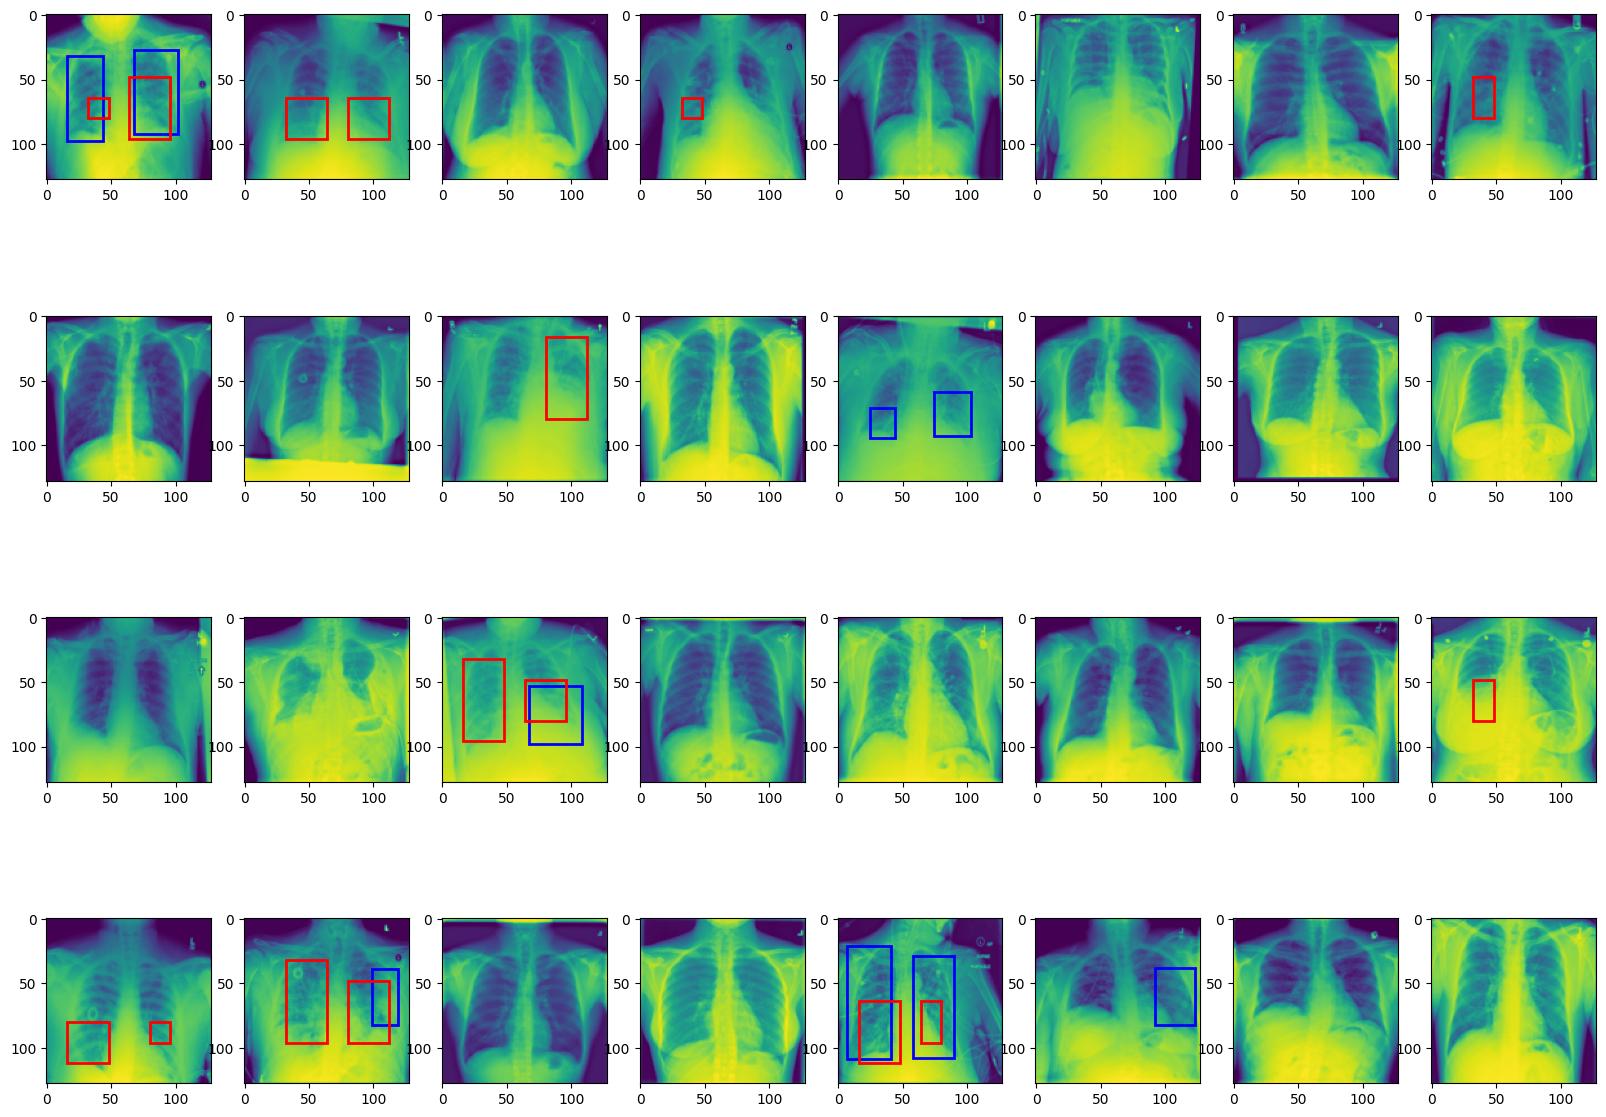

In [55]:
i=0
for imgs, msks in valid_gen:    
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        i=i+1
        #exit after 32 images
        if i>32:
            break
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [56]:
folder = 'stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=100, image_size=128, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in tqdm(test_gen):
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission.csv')

n test samples: 3000


  0%|          | 0/30 [00:00<?, ?it/s]

4/4 [==============================] - 1s 144ms/step


  3%|▎         | 1/30 [00:16<07:54, 16.38s/it]

4/4 [==============================] - 0s 39ms/step


  7%|▋         | 2/30 [00:32<07:31, 16.12s/it]

4/4 [==============================] - 0s 38ms/step


 10%|█         | 3/30 [00:47<07:02, 15.66s/it]

4/4 [==============================] - 0s 38ms/step


 13%|█▎        | 4/30 [01:02<06:41, 15.43s/it]

4/4 [==============================] - 0s 38ms/step


 17%|█▋        | 5/30 [01:17<06:23, 15.34s/it]

4/4 [==============================] - 0s 38ms/step


 20%|██        | 6/30 [01:32<06:04, 15.19s/it]

4/4 [==============================] - 0s 38ms/step


 23%|██▎       | 7/30 [01:47<05:48, 15.16s/it]

4/4 [==============================] - 0s 39ms/step


 27%|██▋       | 8/30 [02:02<05:31, 15.05s/it]

4/4 [==============================] - 0s 39ms/step


 30%|███       | 9/30 [02:17<05:14, 14.96s/it]

4/4 [==============================] - 0s 38ms/step


 33%|███▎      | 10/30 [02:32<04:59, 14.99s/it]

4/4 [==============================] - 0s 39ms/step


 37%|███▋      | 11/30 [02:47<04:47, 15.11s/it]

4/4 [==============================] - 0s 39ms/step


 40%|████      | 12/30 [03:03<04:37, 15.39s/it]

4/4 [==============================] - 0s 38ms/step


 43%|████▎     | 13/30 [03:18<04:20, 15.31s/it]

4/4 [==============================] - 0s 39ms/step


 47%|████▋     | 14/30 [03:33<04:03, 15.21s/it]

4/4 [==============================] - 0s 38ms/step


 50%|█████     | 15/30 [03:48<03:46, 15.12s/it]

4/4 [==============================] - 0s 38ms/step


 53%|█████▎    | 16/30 [04:03<03:31, 15.11s/it]

4/4 [==============================] - 0s 39ms/step


 57%|█████▋    | 17/30 [04:18<03:16, 15.12s/it]

4/4 [==============================] - 0s 39ms/step


 60%|██████    | 18/30 [04:33<03:00, 15.05s/it]

4/4 [==============================] - 0s 40ms/step


 63%|██████▎   | 19/30 [04:48<02:43, 14.87s/it]

4/4 [==============================] - 0s 39ms/step


 67%|██████▋   | 20/30 [05:02<02:27, 14.80s/it]

4/4 [==============================] - 0s 37ms/step


 70%|███████   | 21/30 [05:18<02:15, 15.07s/it]

4/4 [==============================] - 0s 38ms/step


 73%|███████▎  | 22/30 [05:34<02:02, 15.30s/it]

4/4 [==============================] - 0s 38ms/step


 77%|███████▋  | 23/30 [05:49<01:47, 15.33s/it]

4/4 [==============================] - 0s 38ms/step


 80%|████████  | 24/30 [06:04<01:31, 15.26s/it]

4/4 [==============================] - 0s 39ms/step


 83%|████████▎ | 25/30 [06:20<01:16, 15.22s/it]

4/4 [==============================] - 0s 38ms/step


 87%|████████▋ | 26/30 [06:35<01:00, 15.18s/it]

4/4 [==============================] - 0s 38ms/step


 90%|█████████ | 27/30 [06:50<00:45, 15.32s/it]

4/4 [==============================] - 0s 40ms/step


 93%|█████████▎| 28/30 [07:05<00:30, 15.16s/it]

4/4 [==============================] - 0s 40ms/step


 97%|█████████▋| 29/30 [07:20<00:15, 15.06s/it]

4/4 [==============================] - 0s 38ms/step


 97%|█████████▋| 29/30 [07:34<00:15, 15.69s/it]
